In [1]:
# Digital Transformation (DT)
# - 상황인지
    # - 회고:hidesight
    # - 통찰:insight
    # - 예지:foresight
    # - 관리감독:oversight

# - 의사결정
    # - 예측 : ex) 재고예측
    # - 최적화 : 공정의 최적 선택

In [2]:
# Tree 분석
# - 이진트리를 이용해서 분할
# - 분할의 척도 : 정보이득(정보이득을 정량화 하는것 : 불순도(entropy, gini, chisqu))
# - 트리분석의 종류
#     -DT(Dicision tree)
#     -RF(random forest)
#     -Adaboost
#     -Gridentboost
#     -XGBoost
#------------------------
#     -LightGBM
#     -Catboost(딥러닝 요소:tensor bord)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
# 파이프라인 변동화
# 전처리와 모델을 연결해서 통로 구성
# PolynomialFeatures transformation : 다차원으로 변환
# sklearn.preprocessing. <= 대부분의 전처리는 여기에 들어있
def PolynomialRegression(degree=2, **kwargs):   # *list, **dict
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))
    # 하이퍼 파라미터 튜닝을 하려면 , 매개변수의 조합이 변경이 되어야한다 =>그러므로 함수해서 변경을 유도

In [6]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
    rng=np.random.RandomState(rseed)    # RandomState 시드값 부여
    X=rng.rand(N,1)**2  # scikits에서 X데이터는 2차원
    y=10 -1./(X.ravel()+0.1)    #ravel 데이터를 1차원으로 만들려면 : ravel, fatten, reshape
    if err>0:
        y+= err*rng.rand(N)     # y값에 노이즈 붙여서 데이터를 만들고
    return X,y
X, y= make_data(40)
print(type(X))

<class 'numpy.ndarray'>


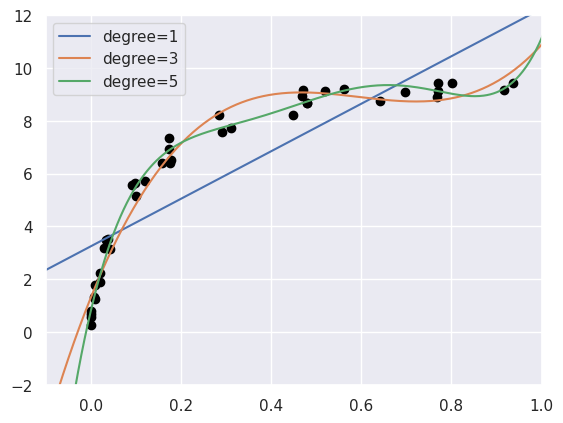

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
X_test=np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(),y,color='black')  # 그래프는 1차원
axis=plt.axis()
for degree in [1,3,5]:  # 1,3,5 차원으로 비선형 회귀
    y_test=PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label='degree={0}'.format(degree))   # 데이터는 2차원, 그래픈는 1차원이라 ravel
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

In [23]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
# 경우의 수: gird 21(arange) * 2(T/F) = 42가지
param_grid={'polynomialfeatures__degree': np.arange(21), # 0~20  20차 방정식
            'linearregression__fit_intercept':[True,False],
            }
# best parameter 조합 :     3차, False
grid=GridSearchCV(PolynomialRegression(),param_grid,cv=7)   # PolynomialRegression 파이프라인, CV = cross validation (교차검증) : 특이한 경우를 방지하기 위해
grid.fit(X,y);                            # 데이터를 7 덩어리의 데이터로 분할 => 모두가 한번은 테스트에 참여하도록
# 42 * 7 만큼 진행하면서 best parameter 찾음

In [24]:
grid.best_params_

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 6}

In [ ]:
grid.cv_results_

In [29]:
# 하나만 볼 때
grid.cv_results_['mean_test_score']

array([-1.05687273e-01,  5.86056038e-01,  8.76868753e-01,  9.54112866e-01,
        9.66515820e-01,  9.77854508e-01,  9.81216602e-01,  9.80840836e-01,
        9.53923955e-01,  9.78280300e-01,  9.80990129e-01,  3.48267165e-01,
       -5.09660671e+00, -5.17480774e+01, -1.21208464e+03, -6.22133057e+03,
       -2.11370129e+03, -6.59372943e+03, -3.39160911e+06, -1.34623140e+07,
       -2.43013259e+09, -1.05687273e-01,  5.86056038e-01,  8.76868753e-01,
        9.54112866e-01,  9.66515820e-01,  9.77854508e-01,  9.81216602e-01,
        9.80840836e-01,  9.53923955e-01,  9.78280300e-01,  9.80990129e-01,
        3.48267165e-01, -5.09660650e+00, -5.17480862e+01, -1.21208564e+03,
       -6.22132725e+03, -2.11401770e+03, -6.58060055e+03, -3.51609395e+06,
       -1.32357162e+07, -4.52619434e+07])

In [30]:
grid.best_score_

0.981216602449397

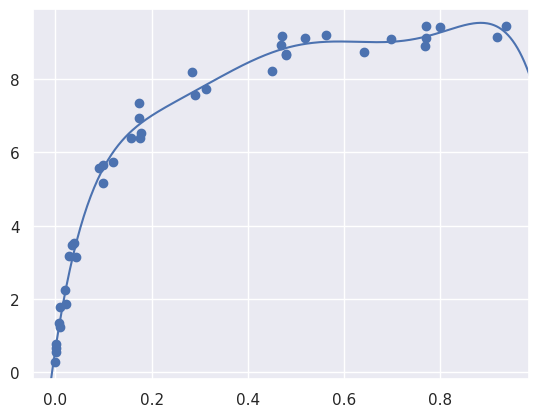

In [32]:
model= grid.best_estimator_
plt.scatter(X.ravel(),y)
lim=plt.axis()
y_test=model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim);

# graphiz, pypot, libgraphviz-dev, pkg-config
# pygraphviz
 필요


In [59]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score     # CV score # 모델에는 score 가있음  , 이건 일반화 함수
from sklearn import tree
# 가지치기  pruning
# min_samples_split 나눌 때의 최소한의 개수 ( 만약 4개라면 ) +> 3/1
# min_samples_leaf 나누고 나서의 개수가 최소한의 수
import matplotlib.pyplot as plt
clf=tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=3,max_leaf_nodes=4)#,max_depth=4)
iris=load_iris()    # Bunch 데이터 타입

[Text(0.4, 0.875, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.2, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.6, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.8, 0.375, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

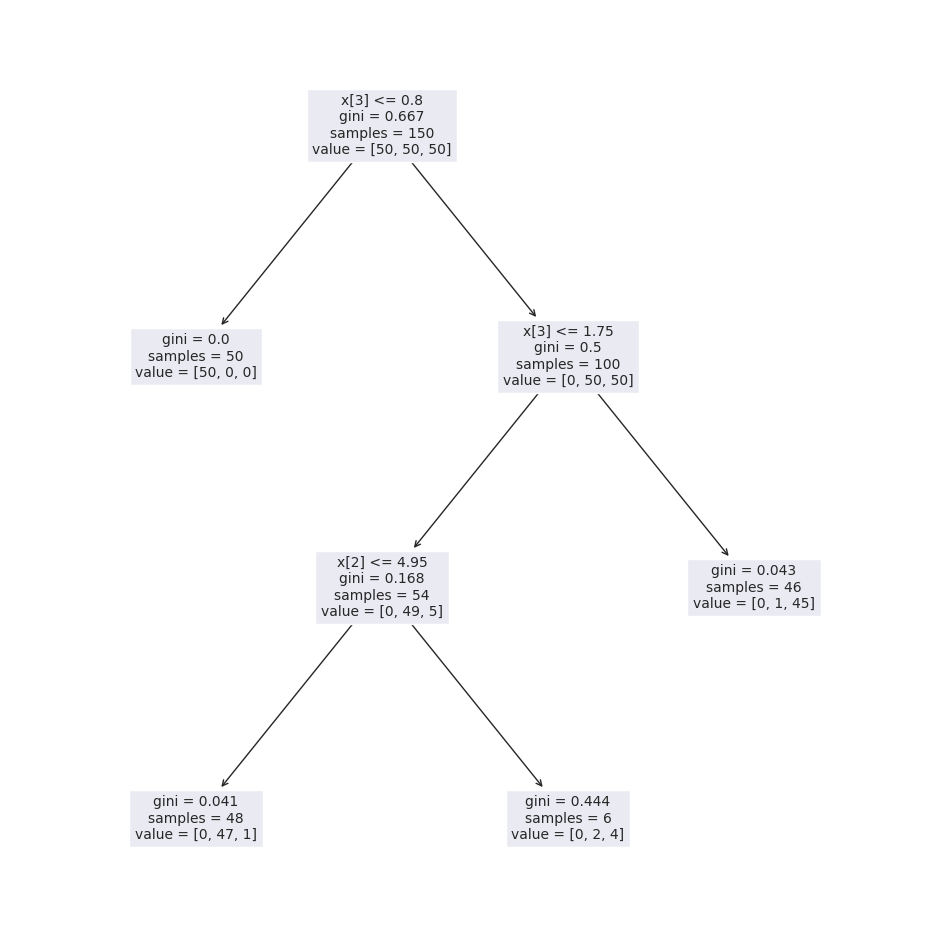

In [60]:
fig,ax = plt.subplots(figsize=(12,12))
clf=clf.fit(iris.data, iris.target) # 독립변수, 종속변수
tree.plot_tree(clf, max_depth=5,fontsize=10)    # 일반함수 ( 매개변수로 트리 모델 )

In [37]:
# gini 불순도 계산 해보기
1-((50/150)*(50/150)+(50/150)*(50/150)+(50/150)*(50/150))

0.6666666666666667

In [40]:
1-((50/50)*(50/50)+(0/50)*(0/50)+(0/50)*(0/50))

0.0

In [41]:
1-((0/100)*(0/100)+(50/100)*(50/100)+(50/100)*(50/100))

0.5

In [42]:
clf.get_depth()     # root는 제외

5

In [ ]:
clf.get_params()

In [56]:
np.sqrt(4)

2.0

In [62]:
# 모델 이 처음 매개변수
# 평가일반화 함수
# CV 가능하기 때문에
cross_val_score(clf, iris.data,iris.target,cv=10)   # cross_val_score    cv 때문에 존재

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler    # scale, zscale
# inverse, transform()
from sklearn.svm import SVC
# 신경망은 나누어지면 그대로 끝
# support vector classifier 데이터의 경계선
# 경계선과 경계선 사이의 최적 분할선을 찾아줌
# support vector 1차 , convex hull() 데이터의 최외곽 경계선
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

winedf=pd.read_csv('/content/drive/MyDrive/daejeon/선생님이 보내주신 csv파일들/winequality-red.csv',sep=';')
print(winedf.head(3))
X=winedf.drop(['quality'],axis=1)
Y=winedf['quality']   # 와인의 품질평가를 판단하기 위해
# 변수를 동일(분산의 사이즈를 동일)하게 대접하기위해서 StandardScaler를 이용해서 정규화
steps=[('scaler',StandardScaler()),('SVM',SVC())]   # 명명식,
# make_pipeline  (함수)
pipeline=Pipeline(steps) # 클래스 인스턴스
# C는 과적합을 방지하기 위해 규제, gamma는 초평면의 모양을 제
parameteres={'SVM__C':[7,8,9,10,11],'SVM__gamma':[0,1,0.01]}
# 충화 표본추출 : 클래스 (분류종류)의 비율을 같게(train/test)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,   # train = 0.8
                                               random_state=30, stratify=Y)
grid=GridSearchCV(pipeline, param_grid=parameteres, cv=5)
grid.fit(X_train, y_train)
print('score=%3.2f' %(grid.score(X_test,y_test)))  # 0.67, score= 0.67
print(grid.best_params_)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
score=0.67
{'SVM__C': 8, 'SVM__gamma': 1}


In [86]:
# 문제)
# - accuracy score
# - cross_val_scrore
# 두 개로 평가해보시오
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
print(accuracy_score(y_test,grid.predict(X_test)))   #실제값, 예측값
print('\n')
cross_val_score(grid, X_test,y_test,cv=2)  # X, y ===모델.score()와 같음
print('\n')
# hyper parameter tuning 해서 확인할 것



0.671875




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [84]:
# 충화추출한결과인 train/test의 비율을 확인해 보시오
import pandas as pd
pd.Series(y_train).value_counts(normalize=True)

5    0.426114
6    0.398749
7    0.124316
4    0.032838
8    0.011728
3    0.006255
Name: quality, dtype: float64

In [80]:
pd.Series(y_test).value_counts(normalize=True)

5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: quality, dtype: float64

In [202]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

# 한글


import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
title =  ['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','RAD', 'TAX','PTRATIO',
          'B', 'LSTAT', 'medv']
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(type(data))
boston_df = pd.DataFrame(data, columns = title )
boston_df.head()


<class 'numpy.ndarray'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [88]:
X=boston_df.iloc[:,:12]
print(X.shape)
Y=boston_df.iloc[:,12]
Y.shape


(506, 12)


(506,)

In [101]:
# RandomForest 가 나오게 된 배경 : DT의 과적합, 열순서를 변경하면 결과가 변경되는 문제를 해결하기 위해 RF 등장
# 랜덤포레스트는 DT를 base_estimator 로 한다
# 특징 : feature_importance 가 출력
# out of bag | 선택되지 못한 데이터들 -> 평가한 것이  oob_score_ 이다
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(oob_score=True)  # 여러개의 모델 basic : DT
rf.fit(X,Y);

In [93]:
rf.feature_importances_

array([0.15731339, 0.00112862, 0.18437844, 0.00245755, 0.03962159,
       0.26826134, 0.18464213, 0.08219847, 0.00609546, 0.00933353,
       0.01841339, 0.0461561 ])

In [94]:
sorted(map(lambda x: round(x,2), rf.feature_importances_))

[0.0, 0.0, 0.01, 0.01, 0.02, 0.04, 0.05, 0.08, 0.16, 0.18, 0.18, 0.27]

In [97]:
sorted(zip(map(lambda x: round(x,2), rf.feature_importances_),title),reverse=True)

[(0.27, 'RM'),
 (0.18, 'INDUS'),
 (0.18, 'AGE'),
 (0.16, 'CRIM'),
 (0.08, 'RAD'),
 (0.05, 'LSTAT'),
 (0.04, 'NOX'),
 (0.02, 'B'),
 (0.01, 'TAX'),
 (0.01, 'PTRATIO'),
 (0.0, 'ZN'),
 (0.0, 'CHAS')]

Text(0.5, 1.0, 'feature importances')

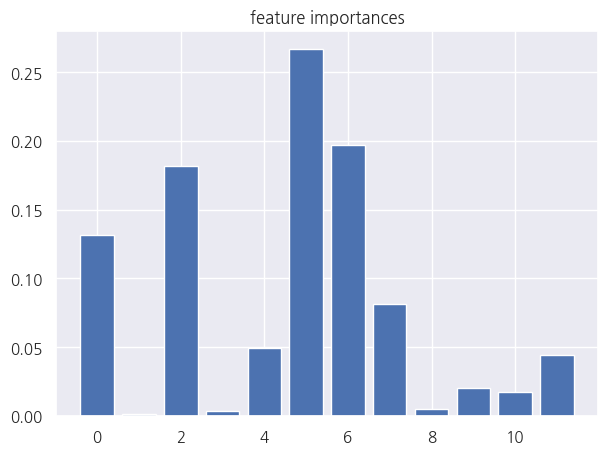

In [103]:
# 시각화
import matplotlib.pyplot as plt
f,ax= plt.subplots(figsize=(7,5))
ax.bar(range(0,len(rf.feature_importances_)),rf.feature_importances_)
ax.set_title('feature importances')

In [102]:
rf.oob_score_

0.6954449837058025

<Axes: >

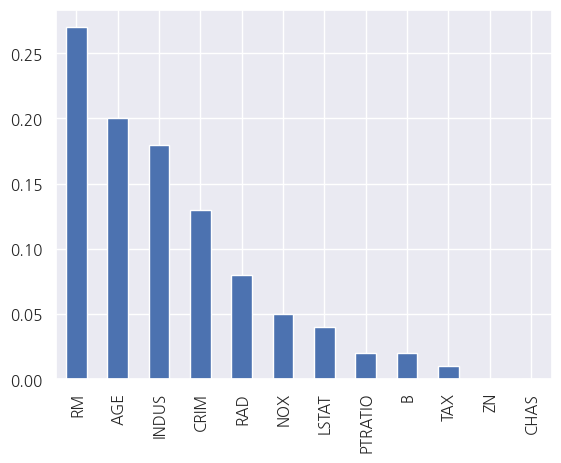

In [110]:
# 문제) 정렬하고 컬럼의 이름을 같이 출력하시오
res = pd.Series(map(lambda x: round(x, 2), rf.feature_importances_), index=title[:12])
res=res.sort_values(ascending=False)
res.plot(kind='bar')

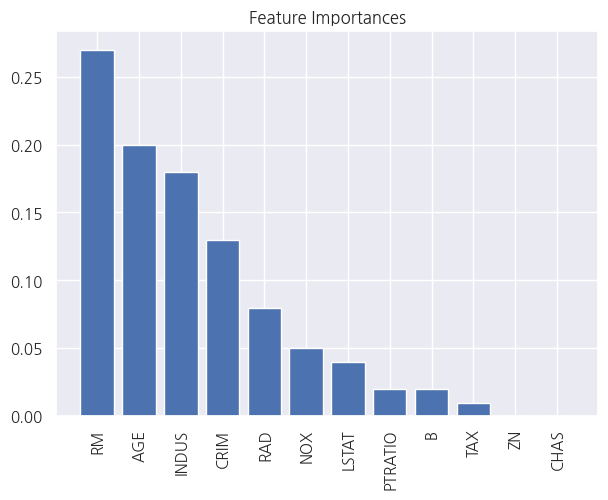

In [105]:
import matplotlib.pyplot as plt
# rf.feature_importances_와 title을 묶어서 정렬
sorted_boston = sorted(zip(map(lambda x: round(x, 2), rf.feature_importances_), title), reverse=True)

# 시각화를 위한 데이터 추출
importances = [item[0] for item in sorted_boston]
features = [item[1] for item in sorted_boston]

# 시각화
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(0, len(sorted_boston)), importances)
ax.set_title('Feature Importances')

# x축 레이블 설정
ax.set_xticks(range(len(sorted_boston)))
ax.set_xticklabels(features, rotation='vertical')
plt.show()

In [111]:
# 평가
rf.score(X,Y)

0.9585002348207515

In [121]:
# 평균 제곱 오차
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score,max_error

In [126]:
pred=rf.predict(X)
# 수식으로
print(np.sum([((Y-pred)**2)/len(Y)]))
mean_squared_error(Y, pred)

2.1120881921343875


2.1120881921343875

In [132]:
print(mean_absolute_error(Y,pred))
print(np.sum(np.abs(Y-pred))/len(Y))

0.9657707509881417
0.9657707509881417


In [163]:
# 결정계수
# r2_score
r2_score(Y,pred)
# 회귀제곱합    (실제-예측)**2
# 잔차제곱합    (실제값 - 예측값)**2
# 총제곱합      (실제값-평균)**2
#
# 구하는  방법
# 회귀제곱합/총제곱값
# 1-(잔차제곱합/총제곱합)


0.9585002348207515

In [165]:
to_sum=np.sum((Y-pred)**2)
to_sum

1068.71662522

In [167]:
# 회귀제곱합
mean_real=np.mean(Y)
reg_sum=(np.sum((pred-mean_real)**2/len(Y)))
(np.sum((pred-mean_real)**2/len(Y)))

41.9907460563566

In [ ]:
# 잔차제곱합
res_sum=np.sum((Y-pred)**2/len(Y))
res_sum

In [ ]:
# 결정계수
reg_sum/(reg_sum+res_sum)

In [ ]:
1-(res_sum/(reg_sum+res_sum))

In [171]:
# 잔차제곱합으로 결정계수를 구한다
def r2_score(y_true,y_pred):
    mean_y_true=np.mean(y_true)
    ssr=np.sum((y_true-y_pred)**2)          # 잔차 제곱합
    sst = np.sum((y_true-mean_y_true)**2)   # 총제곱합
    r2= 1-(ssr/sst)
    return r2
r2_score(Y,pred)

0.9585002348207515

In [188]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# BaggingClassifier= Bootstrap(중복을 허용하면서 데이터를 랜덤으로 선택 - 새로운 조합이 가능) + aggregation
# 분류(투표), 회귀(평균)
bag_clf = BaggingClassifier( # base model을 지정
    DecisionTreeClassifier(random_state=42),n_estimators=10,
    max_samples=100 , bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
print('Acccuracy=',accuracy_score(y_test,y_pred))   # 범용함수(일반함수)

Acccuracy= 0.578125


In [198]:
param_gird={
    'estimator__max_depth':[3,4,5,6],  # pruning 가지치기, regularization 규제
    'max_samples': [0.01, 0.05, 0.1, 0.2]
}
clf=GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=42),
                n_estimators=10, max_samples=100, bootstrap=True, n_jobs=-1,
                random_state=42,max_features=0.5),
                   param_grid)
clf.fit(X_train,y_train)

ValueError: ignored

In [194]:
clf.best_params_

AttributeError: ignored

In [197]:
# 3가지 (Bagging는 base model선택)
# 다른 모델들은 2가지 (모델+ 파라미터)
model= {'model':BaggingClassifier,
        'kwargs':{'estimator':DecisionTreeClassifier()},    # 배깅의 파라미터
        'parameters':   # DT의 파라미터
        {
            'name__estimator__max_depth':[3,4,5,6],
            'name__estimator__max_leaf_nodes':[10,20,30]
        }}
                # 구별되는 이름
pipeline=Pipeline([('name',model['model'](**model['kwargs']))]) # ** 찢어서 넣어라(매개변수)
cv_model=GridSearchCV(pipeline, param_grid=model['parameters'],cv=5)
cv_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('name',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))]),
             param_grid={'name__estimator__max_depth': [3, 4, 5, 6],
                         'name__estimator__max_leaf_nodes': [10, 20, 30]})

In [199]:
# 문제)
# - iris 데이터를 로딩 load_iris
# - 데이터를 분활 (train, test)
# - 사전에 모델학습이 이루어 줘야함(RF)
# - 변수중요도부터 SelectFromModel 함수를 사용해서 변수 선택 (threshold=0.15) 이상만 선색
# - RandomForest 이용해서 분류한 다음 분류 정확도로 평가하시오
# - 변수중요도를 시각화
# 파일로 저장하고 로딩한 다음에 테스트 데이터에 대하여 평가해보시오

In [203]:
# Model 저장
from sklearn import svm
from sklearn import datasets
clf=svm.SVC()   # support vector classifier
X,y=datasets.load_iris(return_X_y=True)
clf.fit(X,y)
import pickle   # 파일 저장
file=open('important', 'wb')  # 이름, 모드:w:write, b:binary
pickle.dump(clf,file)   # 메모리 그대로 저장
file.close()            # 파일은 오픈했으면 꼭 닫아줘야함

In [205]:
file=open('important', 'rb')    # read, binary mode
clf2=pickle.load(file)
clf2.predict(X[0:1])

array([0])